In [1]:
from keras.models import load_model
model=load_model('weed_1.h1')
model.summary()

Using TensorFlow backend.
W0207 14:00:19.987694  5192 deprecation_wrapper.py:119] From C:\Users\kanza\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0207 14:00:20.018999  5192 deprecation_wrapper.py:119] From C:\Users\kanza\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0207 14:00:20.065801  5192 deprecation_wrapper.py:119] From C:\Users\kanza\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0207 14:00:20.175199  5192 deprecation_wrapper.py:119] From C:\Users\kanza\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0207 14:00:20.175199  5192 deprecation_wrapper.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 54, 54, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
__________

In [2]:
from keras.preprocessing import image
import keras.preprocessing.image as Image
import numpy as np

clsdir = "/Users/kanza/Desktop/cluster0129/hosoaogeitou/hosoaogeitou_9_19.jpg"

img=image.load_img(clsdir,target_size=(56,56))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)


(1, 56, 56, 3)


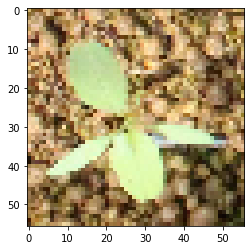

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [5]:
from keras import models
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

In [17]:
activations=activation_model.predict(img_tensor)
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 54, 54, 32)


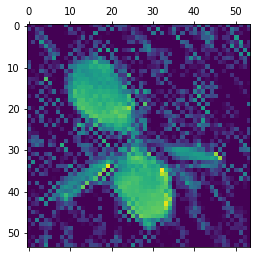

In [7]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0,:,:,3],cmap='viridis')
plt.show()

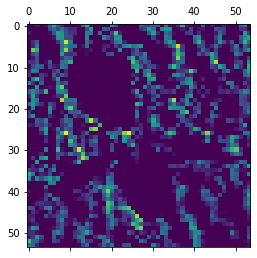

In [8]:
plt.matshow(first_layer_activation[0,:,:,28],cmap='viridis')
plt.show()

C:\Users\kanza\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


MemoryError: 

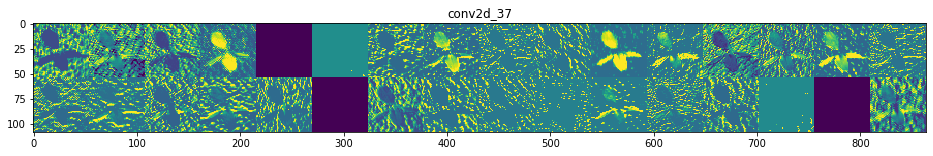

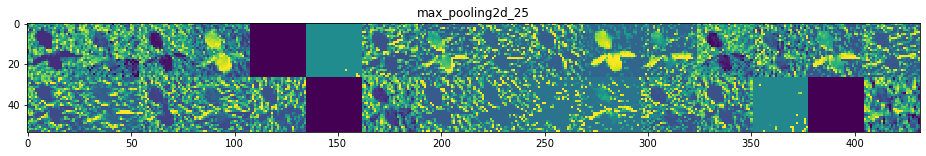

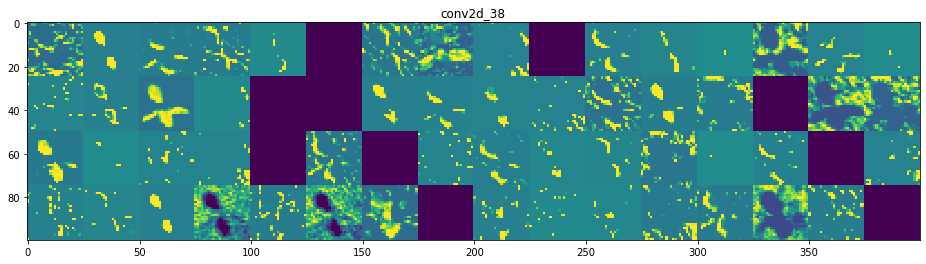

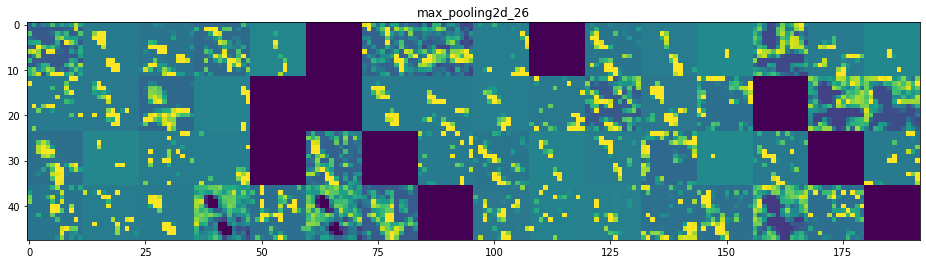

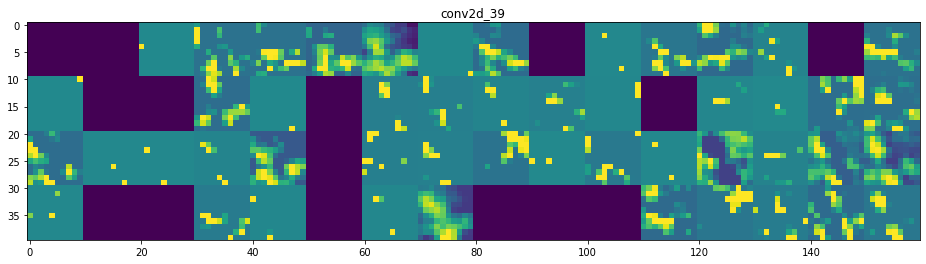

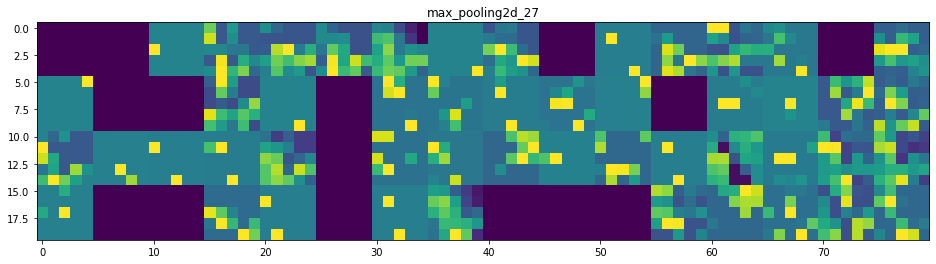

In [9]:
import keras


layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

#特徴マップの表示
for layer_name, layer_activation in zip(layer_names, activations):
     #特徴マップに含まれている特徴量の数
    n_features = layer_activation.shape[-1]

    #特徴マップの形状(1,size,size,n_features)
    size = layer_activation.shape[1]

    #活性化のチャンネルをタイル表示
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    #各フィルタを1つの大きな水平グリッドでタイル表示
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
          #特徴量の見た目をよくする後処理
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

   #グリッドを表示
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [10]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np



#model=load_model('weed_1.h1')
#model.summary()

from keras.applications.vgg16 import VGG16
model=VGG16(weights='imagenet')

#自分のモデルに書き換える方法がわからない

In [11]:
img_path = '/Users/kanza/Desktop/cluster0129/hosoaogeitou/hosoaogeitou_9_19.jpg'

img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

preds=model.predict(x)
np.argmax(preds[0])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
from keras import backend as K


hosoaogeitou=model.output[:,3]

last_conv_layer=model.get_layer('block5_conv3')

grads=K.gradients(hosoaogeitou,last_conv_layer.output)[0]

pooled_grads=K.mean(grads,axis=(0,1,2))

iterate=K.function([model.input],[pooled_grads,last_conv_layer.output[0]])

pooled_grads_value,conv_layer_output_value=iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i]*=pooled_grads_value[i]
    
heatmap=np.mean(conv_layer_output_value,axis=-1)

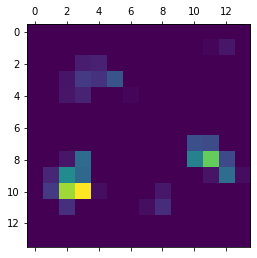

In [13]:
import matplotlib.pyplot as plt

heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)

In [20]:
import cv2

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap) 
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.7+ img

cv2.imwrite('/Users/kanza/Desktop/hosoageitou_cam/hoso_cam6.jpg',superimposed_img)

#保存先のディレクトリと保存名を指定


True